# Proyecto Final: Web Scraper

Integrantes del equipo
---
>-Abimael González García

>-Diego Yael Miranda Suárez

>-Jael Alejandro González Guadarrama 

>-Yorleny Bianeth Serrano Mejía

# Requerimentos
Es necesaria la instalación del navegador Chrome, el cual deberemos tener como navegador predeterminado, y del chromedriver; así como las paqueterías selenium y pandasql.

# Inicio del código

In [1]:
# | Importamos las paqueterías necesarías para el buen funcionamiento del código
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
import time 
import numpy as np
from selenium import webdriver

In [2]:
# | Creamos un documento Excel donde se guardará la información obtenida en la búsqueda
aux=pd.DataFrame()
aux.to_excel("df_proyecto.xlsx",index=False)

# Funciones buscadoras
Comienza la creación de las funciones para las farmacias. Estas funciones serán practicamente análogas, variarán en el nombramiento de caracterísitcas propias de cada sitio (url, dónde se almacenan los datos, etc).

In [3]:
# | Creamos una función que busque los medicamentos en Farmacia Guadalajara
def Buscador_Precios_FGuadalajara(producto, mypath):
    
# | Ingresamos a la página web 
    path = mypath                        
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasguadalajara.com/SearchDisplay?categoryId=&storeId=10151&searchType=1001&catalogId=10052&langId=-24&sType=SimpleSearch&resultCatEntryType=2&showResultsPage=true&searchSource=Q&pageView=&beginIndex=0&pageSize=20&searchTerm="+producto
    driver.get(url)

# | Accedemos a los elementos que contienen los datos que queremos de la pagina web     
    productos = driver.find_elements_by_class_name("product_info") 

# | Accedemos a las urls almacenadas en la variable productos    
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
              
# | Accedemos a los nombres de los productos
    lista_nombres=list()

    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
            
# | Accedemos a los precios base y promo de los productos 
    lista_precios1=list()

    for i in range(len(productos)):
        try:
            lista_precios1.append(productos[i].find_elements_by_class_name("product_price")[0].text.split("\n"))
        except:
            lista_precios1.append(np.nan)
    
# | Como los precios salen en una lista juntos, lo separamos en distintas listas
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(lista_precios1[i][0])
        except:
            lista_precios.append(np.nan)

    for i in range(len(productos)):
        try:
            lista_promos.append(lista_precios1[i][1])
        except:
            lista_promos.append(np.nan)
    
    ### Pasamos toda la informacion de los productos a al documento Excel
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Guadalajara"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]
    
    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome
    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto


# | Creamos una funcion que buscara medicamentos en Farmacia San Pablo
def Buscador_Precios_Selenium_sanpablo(producto,mypath):

# | Ingresamos a la página web    
    path = mypath                                               
    driver=webdriver.Chrome(path)
    url= "https://www.farmaciasanpablo.com.mx/search/?text="+producto 
    driver.get(url)
    
# | Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    productos= driver.find_elements_by_class_name("item")   
    
# | Accedemos a las urls almacenadas en la variable productos    
    lista_urls=[]
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
# | Accedemos a los nombres de los productos            
    lista_nombres=[]
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
# | Como los precios salen en una lista juntos, lo separamos en distintas listas
    lista_precios=[]
    lista_promos=[]
    
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("item-prize")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("item-prize")[1].text)
        except:
            lista_promos.append(np.nan)

    
    ### Pasamos toda la informacion de los productos a al documento Excel
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="San Pablo"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]
    
    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome
    df_proyecto = df_proyecto[df_proyecto["Nombre"].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_proyecto  =df_proyecto.reset_index(drop=True)
    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()
    return df_proyecto


# | Creamos una funcion que buscara medicamentos en Farmacia Del Ahorro
def Buscador_Precios_Selenium_FAhorro(producto,mypath):   
    
# | Ingresamos a la página web    
    path = mypath
    driver=webdriver.Chrome(path)
    url= "https://www.fahorro.com/catalogsearch/result/?q="+producto        
    driver.get(url)

# | Accedemos a los elementos que contienen los datos que queremos de la pagina web    
    productos= driver.find_elements_by_class_name("product-item-info") 

# | Accedemos a las urls almacenadas en la variable productos      
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
# | Accedemos a los nombres de los productos 
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
    
# | Como los precios salen en una lista juntos, lo separamos en distintas listas
    lista_precios=list()
    lista_promos=list()

    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price")[1].text)
        except:
            lista_promos.append(np.nan)
    
    ### Pasamos toda la informacion de los productos a al documento Excel
    df_proyecto = pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio":lista_precios,"Precio con descuento":lista_promos})
    df_proyecto["Farmacia"]="Del Ahorro"
    df_proyecto["Medicamento"]= producto
    df_proyecto["Fecha"]= time.strftime("%d/%m/%y")
    df_proyecto = df_proyecto[["Fecha","Farmacia","Medicamento","Nombre","URL","Precio","Precio con descuento"]]

    ### Una vez pasado convertimos la info a flotante y cerramos la ventana de Chrome
    df_proyecto = df_proyecto[df_proyecto["Nombre"].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_proyecto  =df_proyecto.reset_index(drop=True)

    datos_webscraper=pd.read_excel("df_proyecto.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_proyecto],axis=0)
    datos_webscraper.to_excel("df_proyecto.xlsx",index=False)
    driver.quit()

    return df_proyecto



# | Creamos una funcion que convertirá la información en flotantes
def precios_floats(datos):
    
    # Iteramos sobre la información convirtiendola en flotantes
    for i in range(len(datos["Precio con descuento"])):
        try:
            datos["Precio con descuento"].iloc[i]=datos["Precio con descuento"].iloc[i].strip("$MXN")
        except:
            pass
        
    for i in range(len(datos["Precio"])):
        try:
            datos["Precio"].iloc[i]=datos["Precio"].iloc[i].strip("$MXN")
        except:
            pass
        
    # Guardamos la nueva informacion en el archivo .xslx 
    datos["Precio con descuento"]=datos["Precio con descuento"].replace(",","",regex=True)
    datos["Precio"]=datos["Precio"].replace(",","",regex=True)
      
    datos['Precio con descuento'] = pd.to_numeric(datos['Precio con descuento'], errors='coerce')
    datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')

    datos.to_excel("df_proyectobien.xlsx",index=False)
    return datos
    

# | Creamos una funcion que hará llamar la funciones anteriores   
def Precios(path):
    for productos in ["PARACETAMOL 500 MG", "CLONAZEPAM","VIAGRA", "IBUPROFENO 400 MG"]:   # | Medicamentos a buscar
        Buscador_Precios_FGuadalajara(productos,path)
        Buscador_Precios_Selenium_sanpablo(productos,path)
        Buscador_Precios_Selenium_FAhorro(productos,path)

In [4]:
# | Dirección donde este guardado el Chrome Driver Ejemplo: "C:\WebDriver\chromedriver.exe"
Precios("/Users/jaelgonzalez/Desktop/Escuela/Universidad/TercerSemestre/Manejo/webdriver/chromedriver")
# | Al ejecutarlo este inicia el webdriver y comienza la busqueda de los datos

<ipython-input-3-7ec7f1eab805>:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-3-7ec7f1eab805>:11: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos = driver.find_elements_by_class_name("product_info")
/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
/opt/anaconda3/lib/python3.8/site-packages/selenium/webdriver/remote/webelement.py:464: UserWa

In [5]:
# | Se guarda la información en el archivo .xlsx
df_proyecto=pd.read_excel("df_proyecto.xlsx")

# | Convertimos los precios de str a numeric
precios_floats(df_proyecto)

# | Se guarda esta información corregida en un nuevo archivo .xslx
df_proyecto=pd.read_excel("df_proyectobien.xlsx")

In [6]:
# | Recuperamos el archivo que contiene los datos y lo imprimimos
df_proyecto

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,35.51,14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,10.00,NaN
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,9.50,NaN
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,97.00,NaN
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.50,NaN
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,26.00,NaN
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.00,NaN
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN


# Consultas

In [7]:
# | Esta consulta nos muestra la cantidad de medicamentos por farmacia
ps.sqldf("select * , count(*) as Cantidad from df_proyecto group by Medicamento, Farmacia")

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento,Cantidad
0,27/01/22,Del Ahorro,CLONAZEPAM,MARCA DEL AHORRO CLONAZEPAM 2MG 30TABLETAS,https://www.fahorro.com/marca-del-ahorro-clona...,79.00,NaN,1
1,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,392.05,81.00,13
2,27/01/22,San Pablo,CLONAZEPAM,CLONAZEPAM 2.5 MG,https://www.farmaciasanpablo.com.mx/medicament...,159.00,NaN,2
3,27/01/22,Del Ahorro,IBUPROFENO 400 MG,Marca del Ahorro Ibuprofeno 400 mg 10 cápsulas,https://www.fahorro.com/g-ahorro-ibuprofeno-40...,38.00,NaN,2
4,27/01/22,Guadalajara,IBUPROFENO 400 MG,Ibuprofeno 400mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,84.15,15.50,3
5,27/01/22,San Pablo,IBUPROFENO 400 MG,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,35.00,NaN,2
6,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN,5
7,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99,3
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,10.00,NaN,6
9,27/01/22,Del Ahorro,VIAGRA,Viagra 50 Mg. Oral 4 Tabletas,https://www.fahorro.com/viagra-50-mg-oral-4-ta...,727.00,NaN,8


In [8]:
# | Esta consulta nos limita a 10 resultados 
ps.sqldf("select * from df_proyecto where (Medicamento= 'PARACETAMOL 500 MG') limit 10")#SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,35.51,14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,10.00,NaN
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,9.50,NaN
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,97.00,NaN
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.50,NaN
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,26.00,NaN
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.00,NaN
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN


In [9]:
# | Esta consulta nos muestra los medicamentos de todas las farmacias con precio menor a 150 pesos
ps.sqldf("select * from df_proyecto where  Precio <150  ") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,35.51,14.0
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.5
2,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,10.00,NaN
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,9.50,NaN
4,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,97.00,NaN
5,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.50,NaN
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,26.00,NaN
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.00,NaN
8,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 20 ta...,https://www.fahorro.com/paracetamol-500-mg-ora...,26.00,NaN


In [10]:
# | Esta consulta nos muestra solamente los medicamentos encontrados de la farmacia Guadalajara
ps.sqldf("select * from df_proyecto where (Farmacia = 'Guadalajara') ")#si

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,35.51,14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.50
3,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,392.05,81.00
4,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/ProductDis...,254.00,203.20
5,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,720.00,62.93
6,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2.5mg 10ml Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,491.40,101.52
7,27/01/22,Guadalajara,CLONAZEPAM,Kriadex 2.5mg/1ml 10ml Solución,http://www.farmaciasguadalajara.com/es/farmaci...,254.00,203.20
8,27/01/22,Guadalajara,CLONAZEPAM,Klodex 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,690.00,116.47
9,27/01/22,Guadalajara,CLONAZEPAM,Rivotril Solución 2.5mg/ml 10ml Gotero,http://www.farmaciasguadalajara.com/es/farmaci...,608.00,486.40


In [11]:
# | Esta consulta nos muestra el resultado de buscar un medicamento en las tres farmacias
ps.sqldf("select  * from df_proyecto where (Medicamento= 'PARACETAMOL 500 MG') and ((Farmacia = 'Guadalajara') or (Farmacia = 'San Pablo') or (Farmacia = 'Del Ahorro'))") #SI

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento
0,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99
1,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,35.51,14.00
2,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.50
3,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,10.00,NaN
4,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,https://www.farmaciasanpablo.com.mx/medicament...,9.50,NaN
5,27/01/22,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,https://www.farmaciasanpablo.com.mx/medicament...,97.00,NaN
6,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.50,NaN
7,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,https://www.farmaciasanpablo.com.mx/medicament...,26.00,NaN
8,27/01/22,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,https://www.farmaciasanpablo.com.mx/medicament...,32.00,NaN
9,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN


In [12]:
# | Esta consulta nos muestra el promedio del precio de los medicamentos
ps.sqldf("select Medicamento,avg(Precio) as Precio_promedio from df_proyecto group by Medicamento ")#si

,Medicamento,Precio_promedio
0,CLONAZEPAM,552.465625
1,IBUPROFENO 400 MG,72.427143
2,PARACETAMOL 500 MG,50.522143
3,VIAGRA,591.075909


In [16]:
# | Esta consulta nos muestra un medicamento de cada farmacia
ps.sqldf("select Farmacia, Medicamento, Nombre, Precio from df_proyecto where ((Medicamento= 'VIAGRA') and (Farmacia = 'Guadalajara'))  or ((Medicamento= 'CLONAZEPAM') and (Farmacia = 'Del Ahorro')) or ((Medicamento= 'PARACETAMOL 500 MG') and (Farmacia = 'San Pablo'))") #SI

,Farmacia,Medicamento,Nombre,Precio
0,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,10.00
1,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG,9.50
2,San Pablo,PARACETAMOL 500 MG,BUTILHIOSCINA 10 MG PARACETAMOL 500 MG MG,97.00
3,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,32.50
4,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 50 MG,26.00
5,San Pablo,PARACETAMOL 500 MG,PARACETAMOL 500 MG CAFEÍNA 25 MG FENILEFRINA 5 MG,32.00
6,Del Ahorro,CLONAZEPAM,MARCA DEL AHORRO CLONAZEPAM 2MG 30TABLETAS,79.00
7,Guadalajara,VIAGRA,Viagra 100mg 1 Tableta,330.80
8,Guadalajara,VIAGRA,Viagra 100mg 4 Tabletas,1092.29
9,Guadalajara,VIAGRA,Viagra Jet 50mg 1 Tableta Masticable,314.62


In [14]:
# | Esta consulta nos muestra el precio más bajo de cada medicamento en cada una de las diferentes farmacias
ps.sqldf("select * , MIN(Precio) as 'Mínimo precio' from df_proyecto group by Farmacia, Medicamento")

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento,Mínimo precio
0,27/01/22,Del Ahorro,CLONAZEPAM,MARCA DEL AHORRO CLONAZEPAM 2MG 30TABLETAS,https://www.fahorro.com/marca-del-ahorro-clona...,79.00,NaN,79.00
1,27/01/22,Del Ahorro,IBUPROFENO 400 MG,Marca del Ahorro Ibuprofeno 400 mg 10 cápsulas,https://www.fahorro.com/g-ahorro-ibuprofeno-40...,38.00,NaN,38.00
2,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 10 ta...,https://www.fahorro.com/paracetamol-500-mg-ora...,20.00,NaN,20.00
3,27/01/22,Del Ahorro,VIAGRA,Viagra 50 Mg. Oral 1 Tabletas,https://www.fahorro.com/viagra-50-mg-oral-1-ta...,225.00,NaN,225.00
4,27/01/22,Guadalajara,CLONAZEPAM,Clonazepam 2mg 30 Tabletas,http://www.farmaciasguadalajara.com/ProductDis...,254.00,203.20,254.00
5,27/01/22,Guadalajara,IBUPROFENO 400 MG,Ibuprofeno 400mg 10 Cápsulas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,83.60,21.90,83.60
6,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 10 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,22.00,5.50,22.00
7,27/01/22,Guadalajara,VIAGRA,Viagra 50mg 1 Tableta,http://www.farmaciasguadalajara.com/es/farmaci...,297.72,195.01,297.72
8,27/01/22,San Pablo,CLONAZEPAM,CLONAZEPAM 2 MG,https://www.farmaciasanpablo.com.mx/medicament...,94.00,NaN,94.00
9,27/01/22,San Pablo,IBUPROFENO 400 MG,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,35.00,NaN,35.00


In [15]:
# | Esta consulta nos muestra el precio más alto de cada medicamento en cada una de las diferentes farmacias
ps.sqldf("select * , MAX(Precio) as 'Máximo precio' from df_proyecto group by Farmacia, Medicamento")

,Fecha,Farmacia,Medicamento,Nombre,URL,Precio,Precio con descuento,Máximo precio
0,27/01/22,Del Ahorro,CLONAZEPAM,MARCA DEL AHORRO CLONAZEPAM 2MG 30TABLETAS,https://www.fahorro.com/marca-del-ahorro-clona...,79.00,NaN,79.00
1,27/01/22,Del Ahorro,IBUPROFENO 400 MG,Marca del Ahorro Ibuprofeno 400 mg oral 20 tab...,https://www.fahorro.com/ibuprofeno-400-mg-oral...,54.00,NaN,54.00
2,27/01/22,Del Ahorro,PARACETAMOL 500 MG,Marca del Ahorro Paracetamol 500 mg oral 100 t...,https://www.fahorro.com/paracetamol-500-mg-ora...,94.00,NaN,94.00
3,27/01/22,Del Ahorro,VIAGRA,Viagra Jet 100 Mg. Oral 4 Tabletas Masticables,https://www.fahorro.com/viagra-jet-100-mg-oral...,995.00,NaN,995.00
4,27/01/22,Guadalajara,CLONAZEPAM,Rivotril 2mg 100 Comprimidos,http://www.farmaciasguadalajara.com/es/farmaci...,2291.00,1832.80,2291.00
5,27/01/22,Guadalajara,IBUPROFENO 400 MG,Ibuprofeno 400mg 20 Tabletas Pharmalife,http://www.farmaciasguadalajara.com/es/farmaci...,177.24,28.50,177.24
6,27/01/22,Guadalajara,PARACETAMOL 500 MG,Paracetamol 500mg 100 Tabletas,http://www.farmaciasguadalajara.com/es/farmaci...,229.80,60.99,229.80
7,27/01/22,Guadalajara,VIAGRA,Viagra Jet 100mg 4 Tabletas Masticables,http://www.farmaciasguadalajara.com/es/farmaci...,1164.61,625.86,1164.61
8,27/01/22,San Pablo,CLONAZEPAM,CLONAZEPAM 2.5 MG,https://www.farmaciasanpablo.com.mx/medicament...,159.00,NaN,159.00
9,27/01/22,San Pablo,IBUPROFENO 400 MG,IBUPROFENO 400 MG,https://www.farmaciasanpablo.com.mx/medicament...,35.00,NaN,35.00


# Gráficas

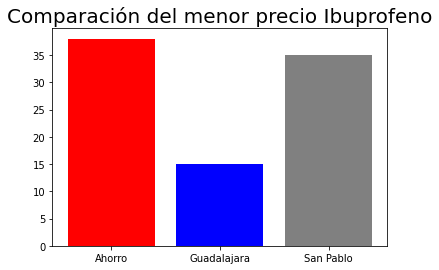

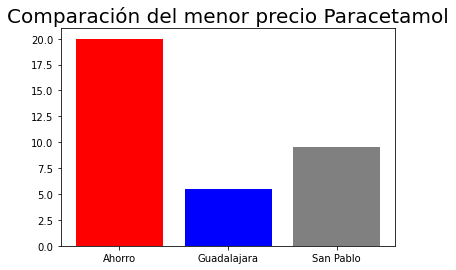

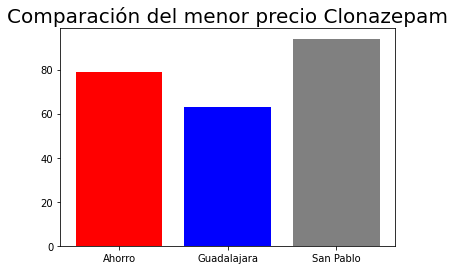

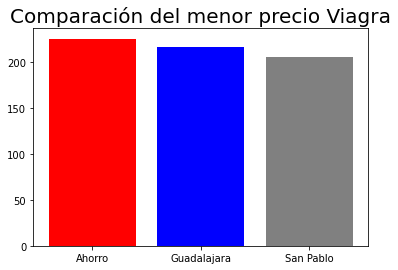

In [14]:
# | Graficamos la diferencia de precios de los medicamentos mas baratos encontrados entre las farmacias
    # Esto con el objetivo de poder comparar el costo de cada producto dependiendo de la farmacia

# | Primero graficaremos el precio más barato del medicamento "Ibuprofeno" con el que cuenta cada farmacia
fig, ax = plt.subplots()
plt.bar(range(3), [38, 15, 35], color=["red","blue","grey"],align='center')
plt.title("Comparación del menor precio Ibuprofeno",fontsize=20)
names = ["Ahorro","Guadalajara","San Pablo"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()

# | Después graficaremos el precio más barato del medicamento "Paracetamol"
fig, ax = plt.subplots()
plt.bar(range(3), [20, 5.5, 9.5], color=["red","blue","grey"],align='center')
plt.title("Comparación del menor precio Paracetamol",fontsize=20)
names = ["Ahorro","Guadalajara","San Pablo"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()

# | Seguimos graficando el precio más barato del medicamento "Clonazepam"
fi, ax = plt.subplots()
plt.bar(range(3), [79, 63, 94], color=["red","blue","grey"],align='center')
plt.title("Comparación del menor precio Clonazepam",fontsize=20)
names = ["Ahorro","Guadalajara","San Pablo"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()

# | Y por último graficaremos el precio más barato del medicamento "Paracetamol"
fig, ax = plt.subplots()
plt.bar(range(3), [225, 216, 205], color=["red","blue","grey"],align='center')
plt.title("Comparación del menor precio Viagra",fontsize=20)
names = ["Ahorro","Guadalajara","San Pablo"]
ax.set_xticks(range(3))
ax.set_xticklabels(names)
plt.show()